# Anibal Muñoz
# 21.087.122-5
# Diego Vergara
# 19.940.239-0
# Cristobal Galaz
# 20.359.833-5

In [3]:
#------Manejo de datos------
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#------Modelos------
from sklearn.cluster import KMeans 
from kneed import KneeLocator

In [4]:
data = pd.read_excel("data.xlsx")
data.shape

(129094, 24)

In [5]:
data.head(1)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,...,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction_encoded,Customer Type_encoded,Type of Travel_encoded,Gender_encoded,Class_Business,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,5,3,5,5,4,...,5,25,18,0,0,1,1,0,0,1


In [6]:
data.values

array([[  13,  460,    3, ...,    0,    0,    1],
       [  25,  235,    3, ...,    1,    0,    0],
       [  26, 1142,    2, ...,    1,    0,    0],
       ...,
       [  52,  674,    4, ...,    0,    1,    0],
       [  44, 3857,    1, ...,    1,    0,    0],
       [  31,  373,    2, ...,    0,    1,    0]], dtype=int64)

In [8]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [123]:
# Reducir dimensiones, por ejemplo a 50 dimensiones
pca = PCA(n_components=24)
data_reduced = pca.fit_transform(data_scaled)

# Con los datos cargados se procedera a realizar clusterizacion

In [11]:
agevsat = data[["Age","Flight Distance"]]
agevsat.head()

,Age,Flight Distance
0,13,460
1,25,235
2,26,1142
3,25,562
4,61,214


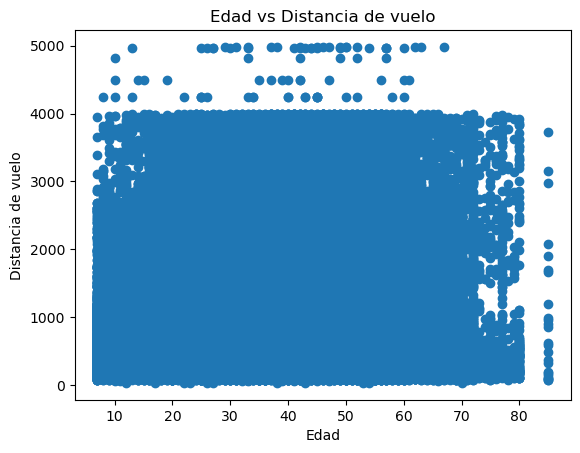

In [18]:
plt.scatter(agevsat['Age'], agevsat['Flight Distance']) 
plt.title('Edad vs Distancia de vuelo')
plt.xlabel('Edad')
plt.ylabel('Distancia de vuelo')
plt.show()

In [20]:
sse = []
# Se realiza el analisis con hasta 20 clusteres, no se cree que supere esa cantidad
for k in range(1, 20):
  print(k)
  kkmeans = KMeans(n_clusters=k)
  kkmeans.fit(agevsat)
  sse.append(kkmeans.inertia_)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


Text(0, 0.5, 'SSE')

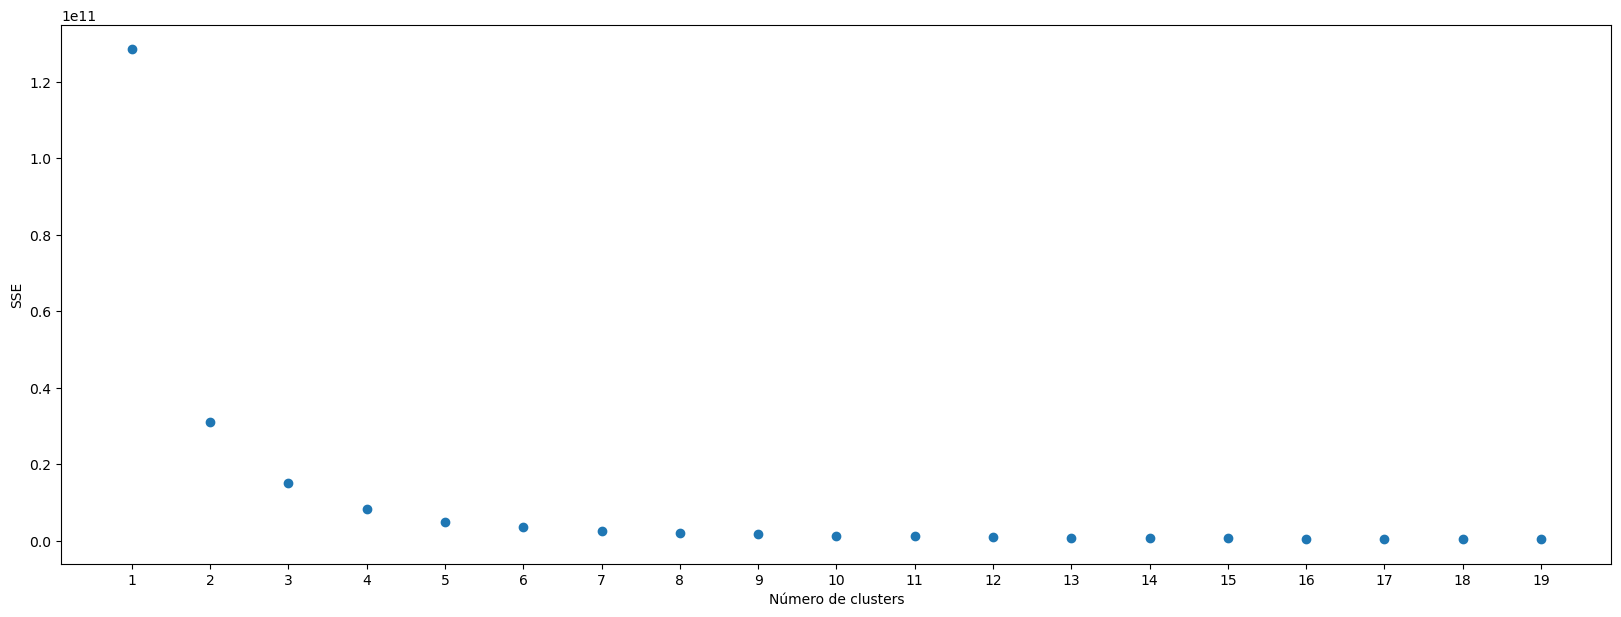

In [21]:
fig, ax = plt.subplots(figsize = (20, 7))
ax.scatter(range(1, 20), sse)
ax.set_xticks(range(1, 20))
ax.set_xlabel("Número de clusters")
ax.set_ylabel("SSE")

In [24]:
kl = KneeLocator(range(1, 20), sse, curve="convex", direction="decreasing")

print("El codo está en k =", kl.elbow)

El codo está en k = 3


In [26]:
kmeans = KMeans(n_clusters=3, random_state=366)

kmeans.fit(agevsat)

KMeans(n_clusters=3, random_state=366)

In [28]:
centroids = kmeans.cluster_centers_
print("Forma de los centroides:",centroids.shape)
print(centroids[:5])

Forma de los centroides: (3, 2)
[[  38.33876336  553.0795311 ]
 [  43.06790945 3189.20222312]
 [  40.34500525 1797.30131182]]


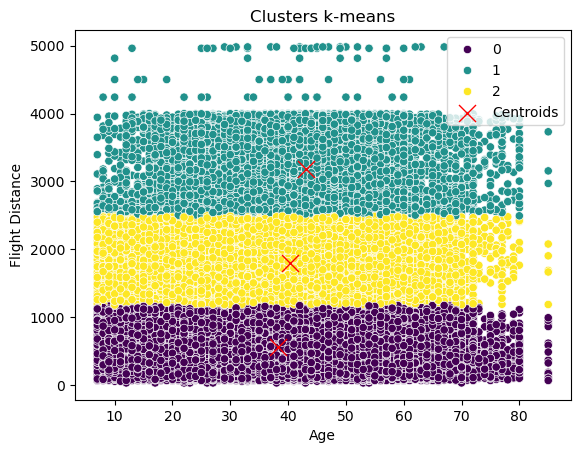

In [30]:
labels = kmeans.labels_

sns.scatterplot(data=agevsat, x='Age', y='Flight Distance', hue=labels, palette='viridis')
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1],
            marker='x', s=150, color='Red', label='Centroids')
plt.title('Clusters k-means')
plt.xlabel('Age')
plt.ylabel('Flight Distance')
plt.legend()
plt.show()

In [36]:
ddmvfd = data[["Departure Delay in Minutes","Flight Distance"]]
ddmvfd.head()

,Age,Flight Distance
0,13,460
1,25,235
2,26,1142
3,25,562
4,61,214


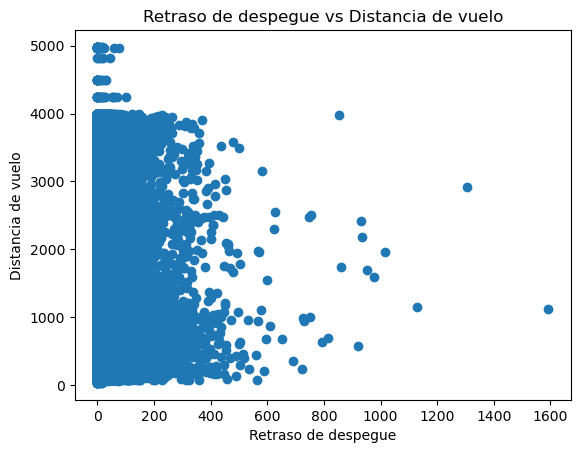

In [40]:
plt.scatter(ddmvfd['Departure Delay in Minutes'], ddmvfd['Flight Distance']) 
plt.title('Retraso de despegue vs Distancia de vuelo')
plt.xlabel('Retraso de despegue')
plt.ylabel('Distancia de vuelo')
plt.show()

In [77]:
sse2 = []
# Se realiza el analisis con hasta 20 clusteres, no se cree que supere esa cantidad
for k in range(1, 20):
  print(k)
  kkmeans2 = KMeans(n_clusters=k)
  kkmeans2.fit(ddmvfd)
  sse2.append(kkmeans2.inertia_)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


Text(0, 0.5, 'SSE')

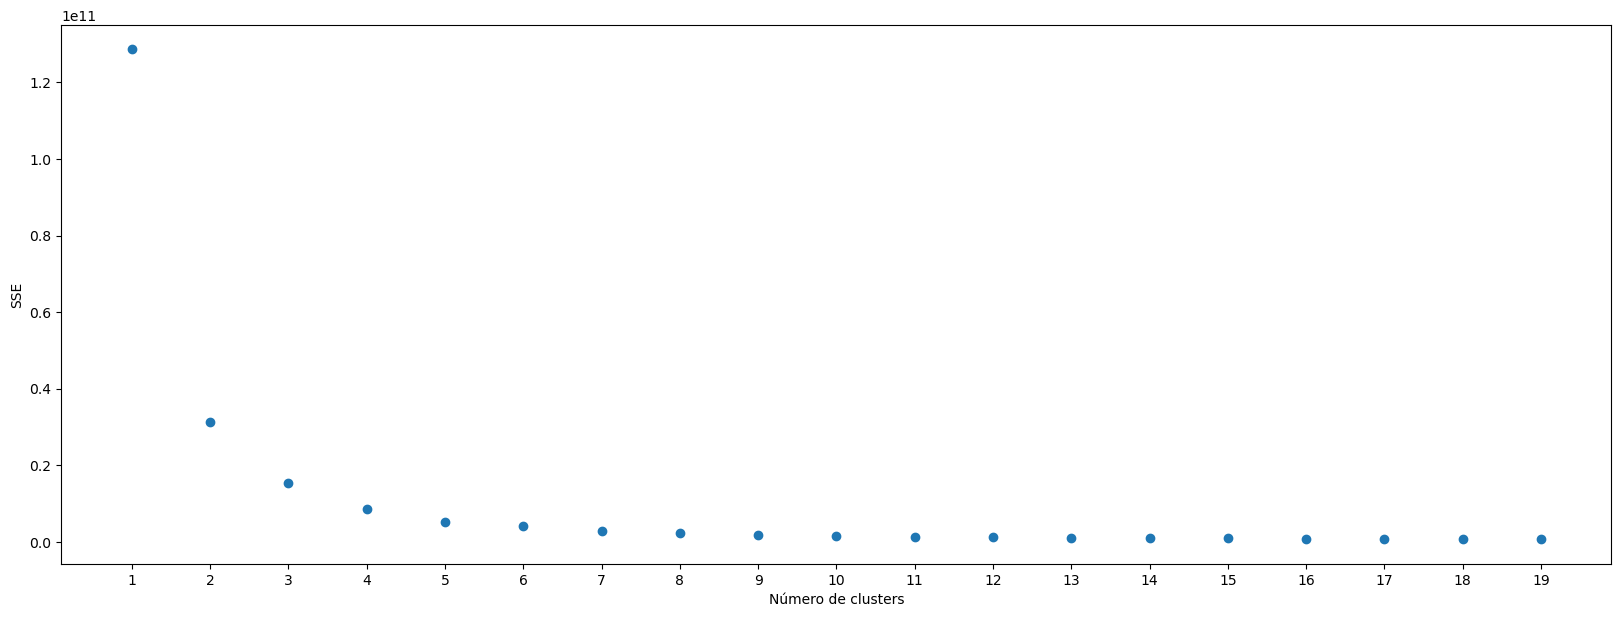

In [79]:
fig, ax = plt.subplots(figsize = (20, 7))
ax.scatter(range(1, 20), sse2)
ax.set_xticks(range(1, 20))
ax.set_xlabel("Número de clusters")
ax.set_ylabel("SSE")

In [81]:
kl = KneeLocator(range(1, 20), sse2, curve="convex", direction="decreasing")

print("El codo está en k =", kl.elbow)

El codo está en k = 3


In [87]:
kmeans2 = KMeans(n_clusters=3, random_state=366)

kmeans2.fit(ddmvfd)

KMeans(n_clusters=3, random_state=366)

In [89]:
centroids2 = kmeans2.cluster_centers_
print("Forma de los centroides:",centroids2.shape)
print(centroids[:5])

Forma de los centroides: (3, 2)
[[  38.33876336  553.0795311 ]
 [  43.06790945 3189.20222312]
 [  40.34500525 1797.30131182]]


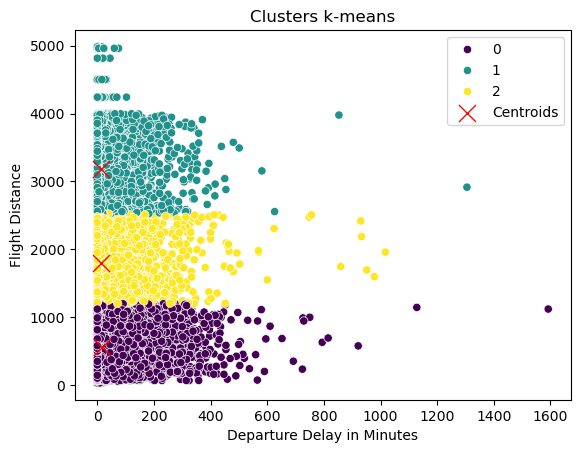

In [91]:
labels = kmeans2.labels_

sns.scatterplot(data=ddmvfd, x='Departure Delay in Minutes', y='Flight Distance', hue=labels, palette='viridis')
sns.scatterplot(x=kmeans2.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1],
            marker='x', s=150, color='Red', label='Centroids')
plt.title('Clusters k-means')
plt.xlabel('Departure Delay in Minutes')
plt.ylabel('Flight Distance')
plt.legend()
plt.show()

In [117]:
ddmvfd2 = data[["Arrival Delay in Minutes","Flight Distance"]]
ddmvfd2.head()

,Arrival Delay in Minutes,Flight Distance
0,18,460
1,6,235
2,0,1142
3,9,562
4,0,214


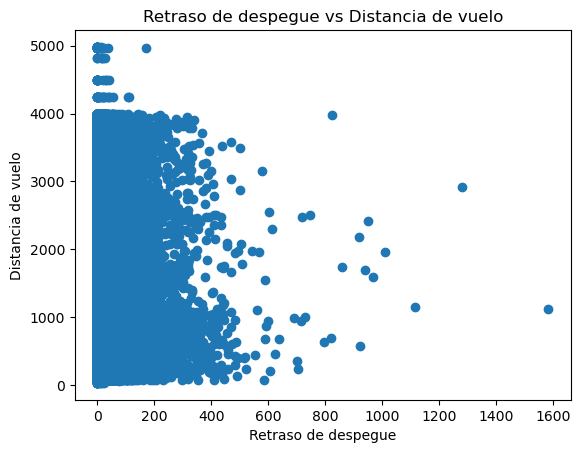

In [119]:
plt.scatter(ddmvfd2['Arrival Delay in Minutes'], ddmvfd2['Flight Distance']) 
plt.title('Retraso de despegue vs Distancia de vuelo')
plt.xlabel('Retraso de despegue')
plt.ylabel('Distancia de vuelo')
plt.show()